#### A couple of reminders:
- most ML algorithms work with tabular data
- features are the data stored in columns
- most ML algorithms also require data input to be represented as a **vector or a matrix**.  
- many ML algorithms also assume the data is distributed normally

#### May deal with a range of data types

- Continuous: integers (whole numbers) or floats (decimals)
- Categorical: types/sets of values/categories
- Ordinal: ranked values
- Boolean: True or False
- Datetime: dates/times

#### Messy and Missing Values

How gaps occur:
- data not being collected properly
- collection and management errors
- data intentionally being omitted

Why do we care?
- Some models cannot work with missing (ie. Nulls/NaN) data
- Missing data may be a sign of a wider data issue
- Missing data may be a way to inform additional features 
    - maybe creating a column with the absence of data recorded

In [ ]:
#replacing missing values in a specific column
#with a given string
df['Column'].fillna(value='None Given', inplace=True)

#record where the values are not missing
df['NewColumn'] = df['ExistingColumn'].notnull()

#drop a specific column
df.drop(columns=['Column_Name'])

#### Issues with Removing ALL rows with Missing Values

- If you were building a predictive model, when you remove all cases that had missing values and **trained the model** as such, when you would receive new data **with** missing values in the test set, you loose the ability to predict well on these rows, because they were not considered in training the model.  Your model would be biasedly trained toward predicting on rows with no missing columns.

The best options:

Categorical Columns - 
- Replace missing values with the most common/occuring value 

Numeric Columns - 
- Replace missing values with a suitable value by measures of central tendency (mean, or median)

**Values calculated on the train set should be applied to both DataFrames, the train and test**

### Dealing with Bad/Messy Data

In [ ]:
#dealign with bad characters
#replace comma with space
df["newcolumn"] = df["oldcolumn"].str.replace(',','')

#if once you replace a bad character and still get an error when
#trying to convert the right datatype, consider other things you still
#need to clean, so device checkpoints to still move through it

### The importance of Distribution of Data

In [ ]:
#Approach 1 - 
#observing the distribution using histogram
import matplotlib as plt
df.hist()
plt.show

#Approach 2 - 
#box plots to know where the chuck of the data sits
#show level of outliers and if there are any unwanted outliers
df[['column']].boxplot()
plt.show()

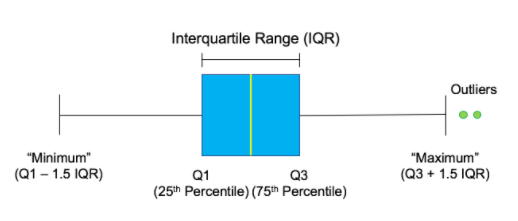

In [ ]:
#Approach 3 - 
#pairing distributions
import seaborn as sns
sns.pairplot(df)

#Extra
#using the describe method for details on your distributions
df.describe()

### Scaling and Transformations

- Fit and transform the training data
- BUT ONLY transform the test data

Most common
- Standardization and MinMaxScaler

Min-Max Scaling
- when the data is scaled linearly between a min and a max value, with 0 to the minimum value and 1 to the maximum value.
- this is essentially: **founding an outer boundary and squeezing everything within**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Age']])

df['normalized_col'] = scaler.transform(df[['Age']])

Standardization (Scaling)
- finds the mean of the data, and centers the distribution around it

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Column']])

df['standardized_col'] = scaler\.transform(df[['Column']])

Log Transformation
- can be used to make highly skewed distributions less skewed

In [ ]:
from sklearn.preprocessing import PowerTransformer

log = PowerTransformer()

log.fit(df[['Column']])

df['log_column'] = log.transform(df[['Column']])

### Removing Outliers

- data points that exist far away from the majority of the data
- can be due to:
    - incorrect data recording
    - genuine rare occurences
- these values could negatively impact the modeling
    - such as: causing scaled data to be squashed to the lower bound

Remove a certain percentage of larges and/or smallest values in data:
- could remove the top 5% (using the 95% quantile and removing everything above it), a good approach when it is reasoned that the highest values in a dataset should be removed.

Eliminate all data greater than 3 standard deviations from the mean as you expect those points to be outliers. ; benefit in genuinely removing extremely values for some reason deemed applicable or necessary.

In [ ]:
#standard deviation detection in Python
mean = df['col_name'].mean()
std = df['col_name'].std()

In [ ]:
lower, upper = mean - cut_off, mean + cut_off

#adding bounds as a mask to the dataframe
new_df = df[(df['col_name'] < upper) & (df['col_name'] > lower)]